### Labeled Mask Dataset (YOLO_darknet)

![Alt text](data.png)

In [2]:

!pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("techzizou/labeled-mask-dataset-yolo-darknet")

print("Path to dataset files:", path)

100%|██████████| 126M/126M [00:23<00:00, 5.58MB/s] 


Extracting files...
Path to dataset files: C:\Users\estya\.cache\kagglehub\datasets\techzizou\labeled-mask-dataset-yolo-darknet\versions\1


In [3]:
import pathlib
import shutil

# ✅ Replace with your actual path
data_dir_path = r"C:\Users\estya\.cache\kagglehub\datasets\techzizou\labeled-mask-dataset-yolo-darknet\versions\1"

# ✅ If the ZIP is already extracted, skip unpacking
# If you see a zip file inside the folder, then you can uncomment this:
# shutil.unpack_archive(data_dir_path + "/archive_2.zip", data_dir_path)

# ✅ Point to the folder that contains images or subfolders
# Adjust "obj" only if that folder exists in your dataset
data_dir = pathlib.Path(data_dir_path)  # remove obj/ if not needed

# ✅ Get all JPG images recursively
image_files = list(data_dir.glob("**/*.jpg"))

print(f"Total images found: {len(image_files)}")
# Optional: print first few
print(image_files[:5])


Total images found: 1510
[WindowsPath('C:/Users/estya/.cache/kagglehub/datasets/techzizou/labeled-mask-dataset-yolo-darknet/versions/1/obj/0-with-mask.jpg'), WindowsPath('C:/Users/estya/.cache/kagglehub/datasets/techzizou/labeled-mask-dataset-yolo-darknet/versions/1/obj/0.jpg'), WindowsPath('C:/Users/estya/.cache/kagglehub/datasets/techzizou/labeled-mask-dataset-yolo-darknet/versions/1/obj/1-with-mask.jpg'), WindowsPath('C:/Users/estya/.cache/kagglehub/datasets/techzizou/labeled-mask-dataset-yolo-darknet/versions/1/obj/10-with-mask.jpg'), WindowsPath('C:/Users/estya/.cache/kagglehub/datasets/techzizou/labeled-mask-dataset-yolo-darknet/versions/1/obj/100-with-mask.jpg')]


In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Using image: C:\Users\estya\.cache\kagglehub\datasets\techzizou\labeled-mask-dataset-yolo-darknet\versions\1\obj\0-with-mask.jpg


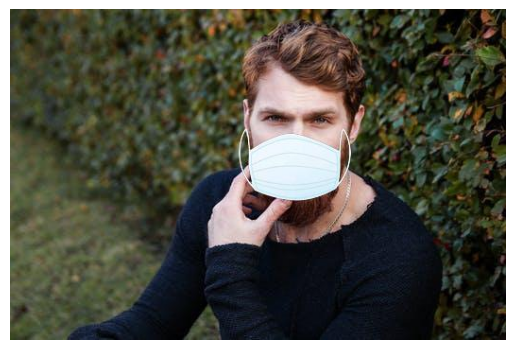

In [38]:

# The following code downloads the latest version of the dataset from Kaggle Hub
# using the kagglehub library. This is a convenient way to access datasets
# without having to manually download them. The dataset is stored in the
# .cache directory under the user's home directory.
simple_image_path = str(image_files[0])

print("Using image:", simple_image_path)
sample_image = cv.imread(simple_image_path,cv.IMREAD_COLOR)
# cv.imread() is a function from OpenCV (cv2) used to read an image file into Python. It returns the image as a NumPy array (matrix of pixel values).

# cv.IMREAD_COLOR This is a flag that tells OpenCV how to read the image.

 #cv.IMREAD_COLOR means:

# -----1)Load the image in color

# -----2)It will have 3 channels: BGR (Blue, Green, Red)

# Equivalent numeric value: 1

plt.imshow(cv.cvtColor(sample_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [32]:
simple_image_path

'C:\\Users\\estya\\.cache\\kagglehub\\datasets\\techzizou\\labeled-mask-dataset-yolo-darknet\\versions\\1\\obj\\unmasked (1882).jpg'

In [33]:
simple_image_path[0:-4]

'C:\\Users\\estya\\.cache\\kagglehub\\datasets\\techzizou\\labeled-mask-dataset-yolo-darknet\\versions\\1\\obj\\unmasked (1882)'

In [35]:
simple_image_path

'C:\\Users\\estya\\.cache\\kagglehub\\datasets\\techzizou\\labeled-mask-dataset-yolo-darknet\\versions\\1\\obj\\unmasked (1882).txt'

In [39]:
simple_image_path = simple_image_path[0:-4] + ".txt"
with open(simple_image_path) as f:
    print(f.readline())
    
# The code above reads the annotation file corresponding to the selected image. The annotation file is expected to be in YOLO format, which typically contains
# information about the objects present in the image, including their class labels and bounding box coordinates. Each line in the annotation file represents one object in the image.

0 0.5752380952380952 0.4142857142857143 0.21714285714285714 0.3485714285714286



In [ ]:
import os,random
def list_files(full_data_path="data_dir",image_exts=[".jpg",".jpeg",".png"],split_percent=[70,20]):
     files = []
     discarded=0
     masked_instances=0
     for r, d, f in os.walk(full_data_path):
         for file in f:
                if file.endswith(".txt"):
                    #first,lets cheak if there is only one instance in the annotation file
                    with open(full_data_path + "/" + file,'r') as fb:
                        lines = fb.readlines()
                        if len(lines)>1:
                            discarded+=1
                            continue
                    
                    strip=file[0:len(file)-len(".txt")]
                    #secondly,check if the paired image file exiists
                    image_path=full_data_path + "/" + strip+img_exts
                    if os.path.isfile(image_path):
                        if lines[0][0]=='0': #class 0 is masked face
                            masked_instances+=1
                            files.append(strip)
                            
size=len(files)
print(str(discarded)+"filses discarded due to multiple instances")
print(str(masked_instances)+"files with masked instances") 
print(str(size)+"total files with single masked instances")
 
random.shuffle(files)
split_training=int((split_percent[0]* size /100))
split_validation=int((split_percent[1]* size /100))+split_training
                         
return files[0:split_training],files[split_training:split_validation],files[split_validation:]

In [56]:
import os, random

def list_files(full_data_path="data_dir", image_exts='.jpg', split_percent=[70, 20]):
    files = []
    discarded = 0
    masked_instances = 0
    for r, d, f in os.walk(full_data_path):
        for file in f:
            if file.endswith(".txt"):
                # first, lets check if there is only one instance in the annotation file
                with open(os.path.join(r, file), 'r') as fb:  # Changed: use r instead of full_data_path
                    lines = fb.readlines()
                    if len(lines) > 1:
                        discarded += 1
                        continue
               
                strip = file[0:len(file)-len(".txt")]
                # secondly, check if the paired image file exists
                image_path = os.path.join(r, strip + image_exts)  # Changed: use r and os.path.join
                if os.path.isfile(image_path):
                        if lines[0][0] == '0':  # class 0 is masked face
                            masked_instances += 1
                        files.append(strip)
                       
                           
    size = len(files)
    print(str(discarded) + " files discarded due to multiple instances")
    print(str(masked_instances) + " files with masked instances")
    print(str(size) + " total files with single masked instances")
     
    random.shuffle(files)
    split_training = int((split_percent[0] * size / 100))
    split_validation = int((split_percent[1] * size / 100)) + split_training
                         
    return files[0:split_training], files[split_training:split_validation], files[split_validation:]

In [57]:
train_files, val_files, test_files = list_files()
print(len(train_files), len(val_files), len(test_files))
print("First 5 training files:", train_files[:5])
print("First 5 validation files:", val_files[:5])
print("First 5 test files:", test_files[:5])

0 files discarded due to multiple instances
0 files with masked instances
0 total files with single masked instances
0 0 0
First 5 training files: []
First 5 validation files: []
First 5 test files: []


# final without error

In [ ]:
import os, random, pathlib

def list_files(full_data_path="data_dir", image_exts='.jpg', split_percent=[70, 20]):
    files = []
    discarded = 0
    masked_instances = 0
    for r, d, f in os.walk(full_data_path):
        for file in f:
            if file.endswith(".txt"):
                # first, lets check if there is only one instance in the annotation file
                with open(os.path.join(r, file), 'r') as fb:
                    lines = fb.readlines()
                    if len(lines) > 1:
                        discarded += 1
                        continue
               
                strip = file[0:len(file)-len(".txt")]
                # secondly, check if the paired image file exists
                image_path = os.path.join(r, strip + image_exts)
                if os.path.isfile(image_path):
                        if lines[0][0] == '0':  # class 0 is masked face
                            masked_instances += 1
                        files.append(strip)
                       
    size = len(files)
    print(str(discarded) + " files discarded due to multiple instances")
    print(str(masked_instances) + " files with masked instances")
    print(str(size) + " total files with single masked instances")
     
    random.shuffle(files)
    split_training = int((split_percent[0] * size / 100))
    split_validation = int((split_percent[1] * size / 100)) + split_training
                         
    return files[0:split_training], files[split_training:split_validation], files[split_validation:]

# ✅ Your actual data path
data_dir_path = r"C:\Users\estya\.cache\kagglehub\datasets\techzizou\labeled-mask-dataset-yolo-darknet\versions\1"
data_dir = pathlib.Path(data_dir_path)

# ✅ Call with the CORRECT path
train_files, val_files, test_files = list_files(
    full_data_path=str(data_dir),  # Use your actual path!
    image_exts='.jpg', 
    split_percent=[70, 20]
)

print(len(train_files), len(val_files), len(test_files))
print("First 5 training files:", train_files[:5])

In [60]:


# The `os` module provides a portable way of using operating system dependent
# functionality: walking directory trees, checking file existence, and joining
# path components. We use it for filesystem traversal and checks.
import os

# `random` is the Python standard library module for pseudorandom operations.
# Here it's used to shuffle the list of discovered files so that train/val/test
# splits are randomized rather than ordered by filename or filesystem order.
import random

# `pathlib` provides an object-oriented interface to filesystem paths.
# It's used below to create a `Path` object for the dataset directory — this
# is convenient and often safer than building strings, though the function
# itself receives a string path.
import pathlib

# -------------------------
# Function definition
# -------------------------
# Define a function named `list_files` that will:
#  1) Walk through `full_data_path` (a directory) recursively,
#  2) For each .txt annotation file, ensure it contains exactly one annotation
#     (skip files with multiple annotations),
#  3) Confirm a paired image file exists for that annotation,
#  4) Collect the base filename (without extension) for qualifying samples,
#  5) Shuffle and split the collected samples into train/val/test according to
#     `split_percent`.
#
# Parameters:
#  - full_data_path (str): root folder where .txt labels and corresponding
#                         images live.
#  - image_exts (str): image file extension used to form the paired image
#                      filename (e.g., '.jpg'). NOTE: your function expects a
#                      single extension string here (matching your call).
#  - split_percent (list): two integers [train_percent, val_percent]. Test % is
#                         implicitly 100 - (train + val).
def list_files(full_data_path="data_dir", image_exts='.jpg', split_percent=[70, 20]):
    # `files` will hold the base filenames (without extension) of samples that:
    #  - have a single annotation line in the corresponding .txt file, and
    #  - have an image file with the given extension present.
    files = []

    # `discarded` counts how many .txt annotation files had more than one
    # annotation line and were therefore skipped.
    discarded = 0

    # `masked_instances` counts how many of the qualifying annotation files
    # indicate class '0' (your domain-level convention: class 0 == masked face).
    masked_instances = 0

    # `os.walk` traverses the directory tree rooted at `full_data_path`.
    # For each directory it yields a tuple: (root, dirnames, filenames).
    # - `r` is the current directory path (string),
    # - `d` is a list of subdirectory names in `r`,
    # - `f` is a list of filenames in `r`.
    # This recursive traversal lets you search nested folders for annotation files.
    for r, d, f in os.walk(full_data_path):
        # Iterate over all filenames in the current directory `r`.
        for file in f:
            # We only care about annotation files which are .txt (YOLO-style
            # annotation files are often .txt where each line is: <class> <x> <y> <w> <h>)
            if file.endswith(".txt"):
                # Open the annotation file for reading. Important:
                #   os.path.join(r, file) builds a correct path regardless of the
                #   operating system path separator.
                #
                # Theory note: using `with open(...) as fb:` ensures the file is
                # properly closed after reading, even if exceptions occur.
                with open(os.path.join(r, file), 'r') as fb:
                    # Read all lines from the annotation file into a list.
                    # Each line typically corresponds to one detected object.
                    lines = fb.readlines()

                    # If the file contains more than one line, that means multiple
                    # instances (objects) were annotated in that image. Your code
                    # treats such cases as "discarded" — presumably because you
                    # want only single-instance images for this dataset/experiment.
                    if len(lines) > 1:
                        discarded += 1
                        # Skip the rest of the processing and continue with next file.
                        continue

                # At this point either:
                #  - `lines` has exactly one element (one annotation), or
                #  - `lines` is empty (no annotation lines). Note: your original
                #    code doesn't explicitly handle empty files — it still
                #    attempts to index lines[0]; ensure your dataset doesn't
                #    contain empty annotation files unless you want to handle that.
                #
                # `strip` is the filename without the trailing ".txt".
                # Example: for '0001.txt', strip == '0001'.
                strip = file[0:len(file)-len(".txt")]

                # Build the expected image path by joining the same directory `r`
                # with the base filename plus the given image extension.
                # Example: os.path.join(r, '0001' + '.jpg') -> '.../0001.jpg'
                image_path = os.path.join(r, strip + image_exts)

                # Check whether the image file actually exists on disk.
                if os.path.isfile(image_path):
                    # If the annotation's first character is '0', increase the
                    # masked_instances counter. This assumes the annotation line
                    # begins with the class id (e.g., '0 0.345 0.456 0.21 0.33').
                    # Domain/theory: YOLO annotations typically start with an
                    # integer class id, followed by normalized bounding-box coords.
                    if lines[0][0] == '0':  # class 0 is masked face
                        masked_instances += 1

                    # Append the base filename (without extension) to the list of files.
                    # Later you can reconstruct both the .txt and image path using this base.
                    files.append(strip)

    # After traversal, `size` is the number of qualifying examples found.
    size = len(files)

    # Print summary statistics. These are plain diagnostic messages to help
    # you know how many files were discarded, how many masked instances were found,
    # and how many total valid single-instance files were collected.
    print(str(discarded) + " files discarded due to multiple instances")
    print(str(masked_instances) + " files with masked instances")
    print(str(size) + " total files with single masked instances")

    # Randomize the order of collected filenames in-place so the train/val/test
    # splits are not biased by filesystem order or filename ordering.
    random.shuffle(files)

    # Compute the number of training examples:
    #  split_percent[0] is the percentage for training (e.g., 70),
    #  multiply by `size` and divide by 100 to get an integer count.
    split_training = int((split_percent[0] * size / 100))

    # Compute the validation split boundary:
    #  split_percent[1] is the percentage for validation (e.g., 20).
    #  We compute how many examples that is, then offset it by the training size
    #  to get the absolute index in the shuffled list where validation ends.
    split_validation = int((split_percent[1] * size / 100)) + split_training

    # Return three slices of the shuffled file list:
    #  - training list: start -> split_training
    #  - validation list: split_training -> split_validation
    #  - test list: split_validation -> end
    return files[0:split_training], files[split_training:split_validation], files[split_validation:]


# -------------------------
# Example usage (unchanged)
# -------------------------

# Your actual dataset path (raw string `r"..."` avoids escaping backslashes on Windows).
data_dir_path = r"C:\Users\estya\.cache\kagglehub\datasets\techzizou\labeled-mask-dataset-yolo-darknet\versions\1"

# Convert the string path into a pathlib.Path object. pathlib.Path provides
# many convenience methods (not required here), and communicates intent: this
# variable represents a filesystem path. We then pass `str(data_dir)` to the
# function because the function expects a string path.
data_dir = pathlib.Path(data_dir_path)

# Call `list_files` with the actual folder and parameters.
# Note: image_exts is passed as '.jpg' (a single extension string) — your
# function will look for files like 'basename.jpg'.
train_files, val_files, test_files = list_files(
    full_data_path=str(data_dir),  # Use your actual path!
    image_exts='.jpg',
    split_percent=[70, 20]
)

# Print the sizes of each split (counts) so you can verify the split sizes.
print(len(train_files), len(val_files), len(test_files))

# Print the first five training filenames (base names without extensions).
print("First 5 training files:", train_files[:5])


218 files discarded due to multiple instances
832 files with masked instances
1292 total files with single masked instances
904 258 130
First 5 training files: ['351-with-mask', 'unmasked (1561)', '244-with-mask', 'masked (1650)', '26-with-mask']


# Resize image 

In [62]:


# Define a constant `input_size` — the target size (height and width)
# to which all images will be resized/padded. Commonly used in CNN-based
# models (like YOLO, ResNet, etc.) that require a fixed input dimension.
# For example, input_size = 244 means each image will be 244x244 pixels.
input_size = 244


# ------------------------------------------------------------
# Function: format_image
# ------------------------------------------------------------
# Purpose:
#   - Rescale and pad an image to a square shape of (input_size x input_size)
#     while maintaining aspect ratio.
#   - Recalculate bounding box coordinates accordingly.
#
# Parameters:
#   img : the original image as a 2D NumPy array (grayscale image).
#         For colored images, this code would need modification.
#   box : bounding box list [x_center, y_center, width, height]
#         with values normalized (YOLO-style, i.e., between 0 and 1).
#
# Returns:
#   new_img : the resized and zero-padded square image.
#   new_box : bounding box coordinates adjusted to the resized image.
def format_image(img, box):

    # Unpack the shape of the image.
    # For grayscale, img.shape gives (height, width).
    # For color images, it would give (height, width, channels).
    # We assume grayscale, so we directly unpack.
    high, width = img.shape

    # `max_size` stores the longer dimension of the image
    # (either height or width).
    # Why? Because we want to scale the image so that its largest dimension
    # matches `input_size` while keeping the aspect ratio unchanged.
    max_size = max(high, width)

    # Compute the scaling ratio `r` — how much the image needs to be reduced
    # so that the largest side fits exactly into `input_size`.
    # Example: if max_size=1000 and input_size=244, then r = 1000/244 ≈ 4.1,
    # meaning every pixel in the resized image will represent ~4 original pixels.
    r = max_size / input_size

    # Calculate the new width and height after scaling down.
    # Divide each original dimension by `r`.
    new_width = int(width / r)
    new_high = int(high / r)

    # Create a tuple representing the new (width, height) for OpenCV resizing.
    new_size = (new_width, new_high)

    # Resize the image using OpenCV (`cv.resize`).
    # - `INTER_AREA` interpolation is best for shrinking an image,
    #   as it minimizes aliasing artifacts.
    # NOTE: You need `cv2` imported as `cv` for this line to work.
    resized = cv.resize(img, new_size, interpolation=cv.INTER_AREA)

    # Create a new blank (black) square image with dimensions
    # (input_size x input_size). We fill it with zeros.
    # dtype=np.uint8 means 8-bit grayscale pixel values (0–255).
    new_img = np.zeros((input_size, input_size), dtype=np.uint8)

    # Copy the resized image into the top-left corner of the blank canvas.
    # This effectively pads the image with black pixels to make it square.
    # Only the top-left part of `new_img` is filled, the rest remains 0.
    new_img[0:new_high, 0:new_width] = resized

    # ------------------------------------------------------------
    # Recalculate bounding box coordinates to match the new image size.
    # ------------------------------------------------------------

    # Unpack YOLO-style normalized bounding box components:
    #  - x, y : center coordinates (normalized 0–1)
    #  - w, h : width and height (normalized 0–1)
    x, y, w, h = box[0], box[1], box[2], box[3]

    # Convert normalized YOLO coordinates into pixel coordinates
    # adjusted for the resized image.
    #
    # Formula breakdown:
    # (x - 0.5*w) -> normalized left (top-left corner x) position.
    # Multiply by `width / r` to scale to the resized image’s coordinate system.
    #
    # Similarly for `y`, `w`, and `h`.
    #
    # The result is a list: [x_min, y_min, box_width, box_height]
    # with integer pixel coordinates.
    new_box = [
        int((x - 0.5 * w) * width / r),
        int((y - 0.5 * h) * high / r),
        int(w * width / r),
        int(h * high / r)
    ]

    # Finally, return both:
    #  - the padded, square, resized image (`new_img`)
    #  - the adjusted bounding box (`new_box`)
    return new_img, new_box


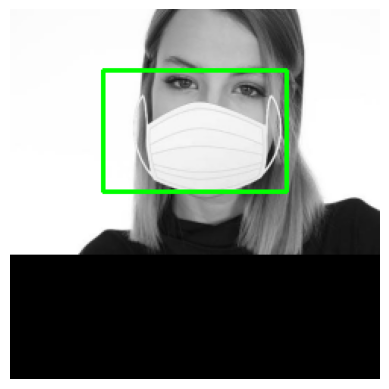

In [67]:
temp_img=cv.imread(str(image_files[2]), cv.IMREAD_GRAYSCALE)
temp_box=[0.5, 0.5, 0.5, 0.5]  # Example box: center (0.5,0.5), width=0.5, height=0.5

temp_img_formated,box=format_image(temp_img, temp_box)
temp_color_img=cv.cvtColor(temp_img_formated, cv.COLOR_GRAY2BGR)
cv.rectangle(temp_color_img,box,(0,255,0),2)
plt.imshow(temp_color_img)
plt.axis('off')
plt.show()

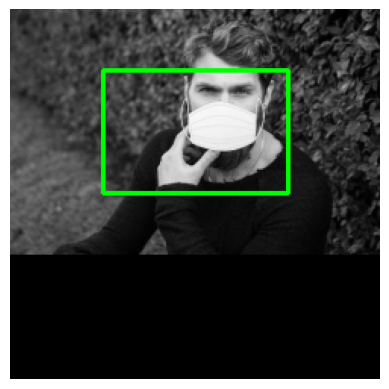

In [70]:


# Import the required libraries
# ------------------------------------------------------------
# `cv2` (imported as `cv`) is OpenCV — a popular computer vision library used
# for image processing, reading/writing images, drawing shapes, etc.
import cv2 as cv

# `matplotlib.pyplot` (imported as `plt`) is used for displaying images
# and plots inline (commonly used in notebooks and scripts for visualization).
import matplotlib.pyplot as plt


# ------------------------------------------------------------
# Load an example image (grayscale)
# ------------------------------------------------------------

# Here, `image_files` is assumed to be a list of file paths to images.
# We read the first image in grayscale mode.
# `cv.IMREAD_GRAYSCALE` ensures the image has only one channel (0–255 intensity),
# rather than three channels (BGR). This simplifies processing.
temp_img = cv.imread(str(image_files[0]), cv.IMREAD_GRAYSCALE)

# Check if the image was successfully loaded
# (Optional but good practice — avoids later errors if the path is wrong)
if temp_img is None:
    raise FileNotFoundError(f"Could not load image: {image_files[0]}")

# ------------------------------------------------------------
# Define a temporary bounding box for testing
# ------------------------------------------------------------

# In YOLO format, a bounding box is defined as [x_center, y_center, width, height],
# where each value is normalized (ranging from 0 to 1).
# Here, we use a synthetic example: a box centered in the middle of the image (0.5,0.5)
# and occupying half of the image width and height (0.5,0.5).
temp_box = [0.5, 0.5, 0.5, 0.5]


# ------------------------------------------------------------
# Apply the formatting (resize + pad + adjust bounding box)
# ------------------------------------------------------------

# Call the `format_image()` function you defined earlier.
# It resizes the image to a fixed square shape (input_size × input_size)
# while keeping the aspect ratio, and adjusts the bounding box accordingly.
temp_img_formated, box = format_image(temp_img, temp_box)


# ------------------------------------------------------------
# Convert grayscale image to color (BGR) for visualization
# ------------------------------------------------------------

# OpenCV’s `rectangle()` expects a color image when drawing colored boxes.
# So we convert grayscale (1 channel) → BGR (3 channels).
# The pixel intensities remain the same, but are copied across 3 channels.
temp_color_img = cv.cvtColor(temp_img_formated, cv.COLOR_GRAY2BGR)


# ------------------------------------------------------------
# Draw the bounding box on the image
# ------------------------------------------------------------

# OpenCV’s `cv.rectangle()` draws a rectangle over an image.
# Parameters:
#  - First: the image to draw on.
#  - Second: the top-left and bottom-right coordinates of the box.
#  - Third: the color in BGR (here, (0,255,0) = green).
#  - Fourth: the line thickness (here, 2 pixels).
#
# NOTE: Your `box` list is [x, y, w, h], so we compute bottom-right manually.
x, y, w, h = box
cv.rectangle(temp_color_img, (x, y), (x + w, y + h), (0, 255, 0), 2)


# ------------------------------------------------------------
# Display the image using matplotlib
# ------------------------------------------------------------

# Convert the color format from BGR (used by OpenCV) to RGB (used by matplotlib),
# so the colors display correctly (otherwise green might appear blue, etc.).
temp_color_img = cv.cvtColor(temp_color_img, cv.COLOR_BGR2RGB)

# Display the image with the bounding box
plt.imshow(temp_color_img)

# Hide axis ticks and labels for a cleaner image view
plt.axis('off')

# Show the final image
plt.show()


In [69]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow logging
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


In [71]:
def data_load(files,full_data_path="data_dir", image_exts='.jpg'):
    X=[]
    Y=[]
    for file in files:
        # Load image in grayscale
        img=cv.imread(os.path.join(full_data_path, file + image_exts), cv.IMREAD_GRAYSCALE)
        k=1
        with open(os.path.join(full_data_path, file + ".txt"),'r') as fp:
            line=fp.readline()[0]
            if line[0]=='0': #class 0 is masked face
                k=0
                
            box=np.array(line[1:].split(), dtype=np.float32)   
        img,box=format_image(img, box)
        img=img.astype(np.float32)/255.0
        box =np.asarray(box, dtype=np.float)/input_size
        label=np.append(box,k)
        X.append(img)
        Y.append(label)
    X=np.array(X)
    X=np.expand_dims(X, axis=3) #add channel dimension
    X=tf.convert_to_tensor(X, dtype=tf.float32)
    Y=tf.convert_to_tensor(Y, dtype=tf.float32)
    result=tf.data.Dataset.from_tensor_slices((X,Y))
    return result

In [ ]:
def data_load(files, full_data_path="data_dir", image_exts='.jpg'):
    X = []
    Y = []
    for file in files:
        # Load image in grayscale
        img = cv.imread(os.path.join(full_data_path, file + image_exts), cv.IMREAD_GRAYSCALE)
        k = 1
        with open(os.path.join(full_data_path, file + ".txt"), 'r') as fp:
            line = fp.readline()  # Fixed: removed [0]
            if line[0] == '0':  # class 0 is masked face
                k = 0
               
            box = np.array(line[1:].split(), dtype=np.float32)  
        
        img, box = format_image(img, box)
        img = img.astype(np.float32) / 255.0
        box = np.asarray(box, dtype=np.float) / input_size
        label = np.append(box, k)
        X.append(img)
        Y.append(label)
    
    X = np.array(X)
    X = np.expand_dims(X, axis=3)  # add channel dimension
    X = tf.convert_to_tensor(X, dtype=tf.float32)
    Y = tf.convert_to_tensor(Y, dtype=tf.float32)
    result = tf.data.Dataset.from_tensor_slices((X, Y))
    return result